Enter the stock ticker symbol: LLY

Stock Info for LLY:
Full Name:           Eli Lilly and Company
Current Market Price: $877.79
Target Mean Price:   Not Available
52 Week High:        $972.53
52 Week Low:         $516.57

Top 5 Trending Stocks:
1. TSLA - Tesla, Inc.
2. AAPL - Apple Inc.
3. AMZN - Amazon.com, Inc.
4. MSFT - Microsoft Corporation
5. NFLX - Netflix, Inc.

Data saved to LLY_stock_info.csv


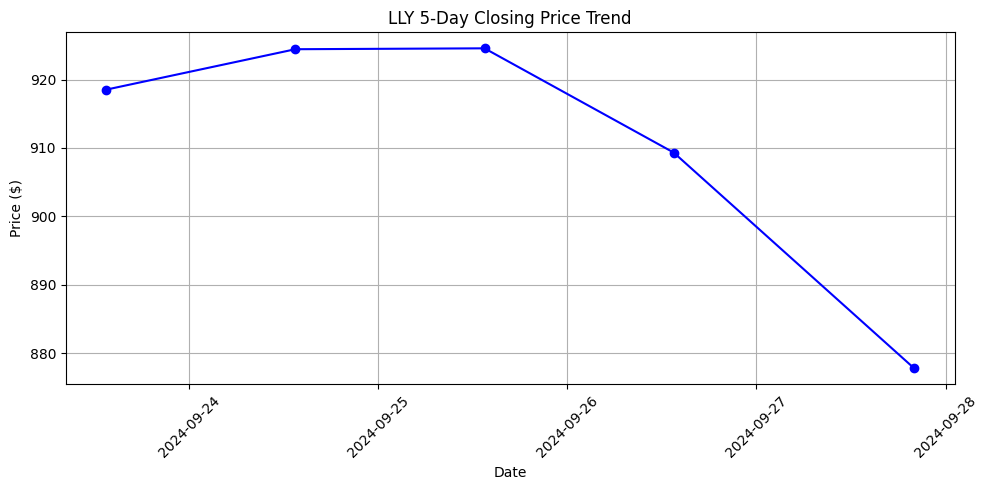

In [22]:
#import dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

api_key = 'JTwdBojHYr9dsnvO0WQkQ5uDoOcaUOpW4dEBeJik'
base_url = 'https://yfapi.net/v6/finance/quote'

#define function to fetch stock data
def get_stock_data(ticker):
    try:
        #prepare the url with the correct endpoint and query parameters
        url = f"{base_url}?symbols={ticker}"

        #make the request with the correct headers
        headers = {
            'accept': 'application/json',
            'X-API-KEY': api_key
        }

        response = requests.get(url, headers=headers)

        #check for successful response
        if response.status_code == 200:
            data = response.json()
            if 'quoteResponse' in data and data['quoteResponse']['result']:
                stock_info = data['quoteResponse']['result'][0]
                return {
                    'symbol': stock_info.get('symbol', 'N/A'),
                    'longName': stock_info.get('longName', 'N/A'),
                    'currentPrice': stock_info.get('regularMarketPrice', 'N/A'),
                    'targetMeanPrice': stock_info.get('targetMeanPrice', 'N/A') if 'targetMeanPrice' in stock_info else 'Not Available',
                    'fiftyTwoWeekHigh': stock_info.get('fiftyTwoWeekHigh', 'N/A'),
                    'fiftyTwoWeekLow': stock_info.get('fiftyTwoWeekLow', 'N/A'),
                }
            else:
                print("No information found.")
        else:
            print(f"Failed to fetch data, status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None

#define function to plot historical data
def plot_historical_data(ticker):
    try:
        #using the spark endpoint for historical data
        url = f"https://yfapi.net/v8/finance/spark?symbols={ticker}&range=5d&interval=1d"

        headers = {
            'accept': 'application/json',
            'X-API-KEY': API_KEY
        }

        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            data = response.json()
            if ticker in data and 'timestamp' in data[ticker] and 'close' in data[ticker]:
                historical_data = data[ticker]
                dates = [datetime.datetime.fromtimestamp(ts) for ts in historical_data['timestamp']]
                prices = historical_data['close']

                #plot the data with formatted date
                plt.figure(figsize=(10, 5))
                plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                plt.gca().xaxis.set_major_locator(mdates.DayLocator())

                plt.plot(dates, prices, marker='o', linestyle='-', color='b')
                plt.title(f"{ticker.upper()} 5-Day Closing Price Trend")
                plt.xlabel("Date")
                plt.ylabel("Price ($)")
                plt.grid(True)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
            else:
                print("No historical data found.")
        else:
            print(f"Failed to fetch historical data, status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

#define main function to drive the program
def main():
    #take user input
    ticker = input("Enter the stock ticker symbol: ").upper()

    #fetch stock data
    stock_data = get_stock_data(ticker)

    if stock_data:
        #extract relevant data
        ticker_symbol = stock_data.get('symbol')
        full_name = stock_data.get('longName')
        current_price = stock_data.get('currentPrice')
        target_mean_price = stock_data.get('targetMeanPrice')
        week_52_high = stock_data.get('fiftyTwoWeekHigh')
        week_52_low = stock_data.get('fiftyTwoWeekLow')

        #display stock data in a clean format
        print(f"\nStock Info for {ticker_symbol}:")
        print(f"{'Full Name:':<20} {full_name}")
        print(f"{'Current Market Price:':<20} ${current_price}")
        print(f"{'Target Mean Price:':<20} {target_mean_price}")
        print(f"{'52 Week High:':<20} ${week_52_high}")
        print(f"{'52 Week Low:':<20} ${week_52_low}")

        #trending stocks
        trending_stocks = get_trending_stocks()
        print("\nTop 5 Trending Stocks:")
        for i, stock in enumerate(trending_stocks, 1):
            print(f"{i}. {stock['symbol']} - {stock['longName']}")

        #save data to dataframe and csv
        stock_df = pd.DataFrame([{
            'Ticker': ticker_symbol,
            'Full Name': full_name,
            'Current Market Price': current_price,
            'Target Mean Price': target_mean_price,
            '52 Week High': week_52_high,
            '52 Week Low': week_52_low
        }])

        stock_df.to_csv(f'{ticker}_stock_info.csv', index=False)
        print(f"\nData saved to {ticker}_stock_info.csv")

        #bonus: Plot historical data
        plot_historical_data(ticker)
    else:
        print("No data found for the given ticker.")

if __name__ == "__main__":
    main()
